In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import os 

img_size = 150
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# ✅ Training Data
train_generator = train_datagen.flow_from_directory(
    directory='/kaggle/input/oily-dry-and-normal-skin-types-dataset/Oily-Dry-Skin-Types/train',  # Use train folder
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

# ✅ Validation Data
val_generator = train_datagen.flow_from_directory(
    directory='/kaggle/input/oily-dry-and-normal-skin-types-dataset/Oily-Dry-Skin-Types/valid',  # Still using train (with subset)
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# ✅ Test Data (No subset needed)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    directory='/kaggle/input/oily-dry-and-normal-skin-types-dataset/Oily-Dry-Skin-Types/test',  # Use test folder
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # No need to shuffle test data
)

# ✅ Check Class Labels
print("Class labels:", train_generator.class_indices)


2025-07-18 08:52:43.445679: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752828763.689202      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752828763.758545      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 2206 images belonging to 3 classes.
Found 52 images belonging to 3 classes.
Found 134 images belonging to 3 classes.
Class labels: {'dry': 0, 'normal': 1, 'oily': 2}


In [3]:
# Define paths
train_path = "/kaggle/input/oily-dry-and-normal-skin-types-dataset/Oily-Dry-Skin-Types/train"
val_path = "/kaggle/input/oily-dry-and-normal-skin-types-dataset/Oily-Dry-Skin-Types/valid"
test_path = "/kaggle/input/oily-dry-and-normal-skin-types-dataset/Oily-Dry-Skin-Types/test"

In [4]:
import os

base_path = "/kaggle/input/oily-dry-and-normal-skin-types-dataset/Oily-Dry-Skin-Types"
print("Contents of base directory:", os.listdir(base_path))

# Check train directory
train_path = os.path.join(base_path, "train")
if os.path.exists(train_path):
    print("\nContents of 'train':", os.listdir(train_path))
else:
    print("\n'train' directory not found!")

# Repeat for validation and test
val_path = os.path.join(base_path, "valid")
if os.path.exists(val_path):
    print("\nContents of 'valid':", os.listdir(val_path))
else:
    print("\n'valid' directory not found!")

test_path = os.path.join(base_path, "test")
if os.path.exists(test_path):
    print("\nContents of 'test':", os.listdir(test_path))
else:
    print("\n'test' directory not found!")

Contents of base directory: ['README.dataset.txt', 'valid', 'test', 'train']

Contents of 'train': ['dry', 'normal', 'oily']

Contents of 'valid': ['dry', 'normal', 'oily']

Contents of 'test': ['dry', 'normal', 'oily']


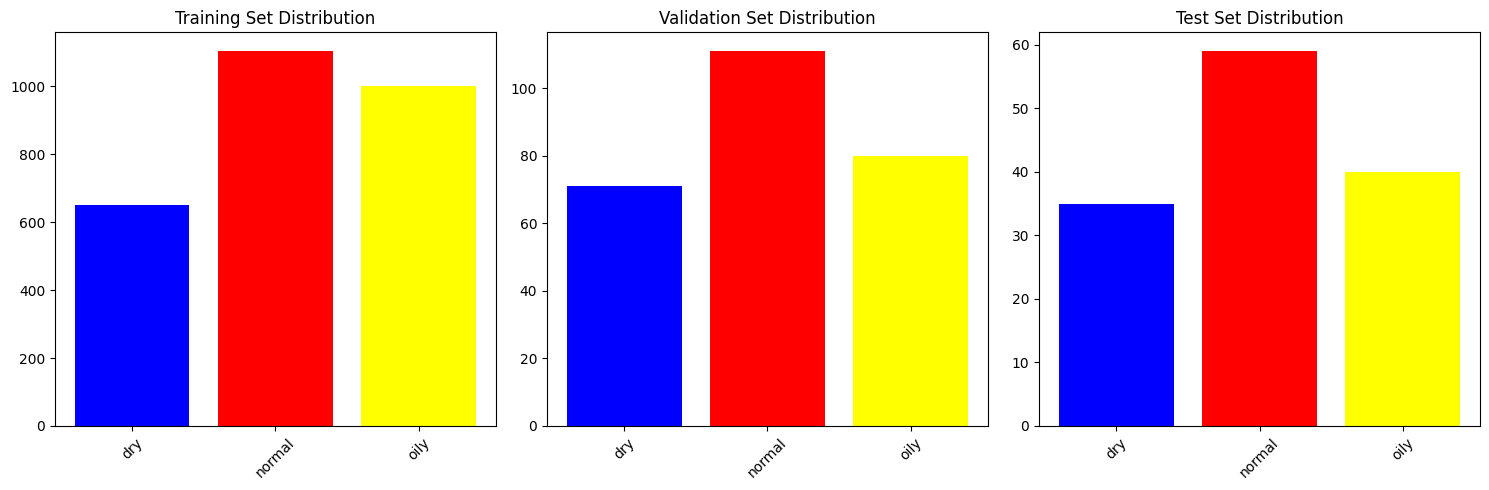

In [5]:
import os
import matplotlib.pyplot as plt

def count_images(directory):
    categories = ['dry','normal','oily']
    counts = {}
    for category in categories:
        path = os.path.join(directory, category)
        if os.path.exists(path):
            counts[category] = len(os.listdir(path))
        else:
            counts[category] = 0
            print(f"Warning: Directory {path} not found")
    return counts

# Get image counts (with path validation)
base_path = "/kaggle/input/oily-dry-and-normal-skin-types-dataset/Oily-Dry-Skin-Types"
try:
    train_counts = count_images(os.path.join(base_path, "train"))
    val_counts = count_images(os.path.join(base_path, "valid"))
    test_counts = count_images(os.path.join(base_path, "test"))
except Exception as e:
    print(f"Error accessing dataset: {e}")
    raise

# Plot distribution
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
colors = ['blue', 'red', 'yellow']
for i, (dataset, counts) in enumerate(zip(["Training", "Validation", "Test"], [train_counts, val_counts, test_counts])):
    ax[i].bar(counts.keys(), counts.values(), color=colors)
    ax[i].set_title(f"{dataset} Set Distribution")
    ax[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

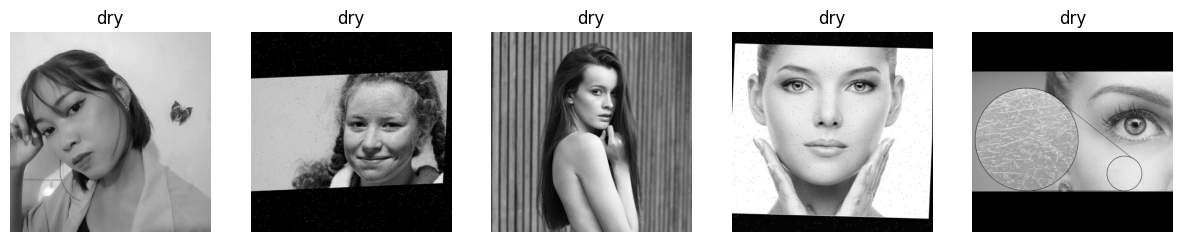

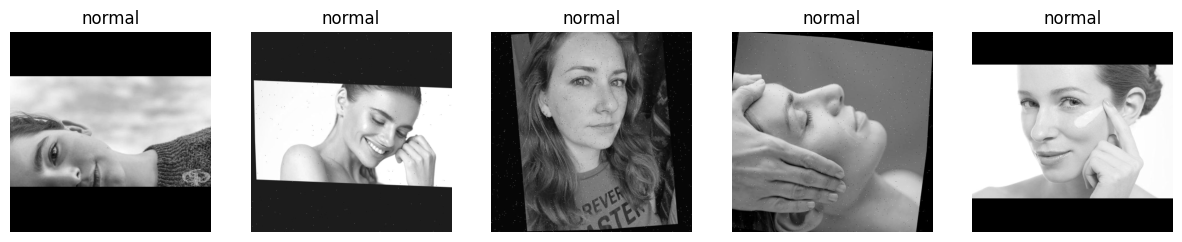

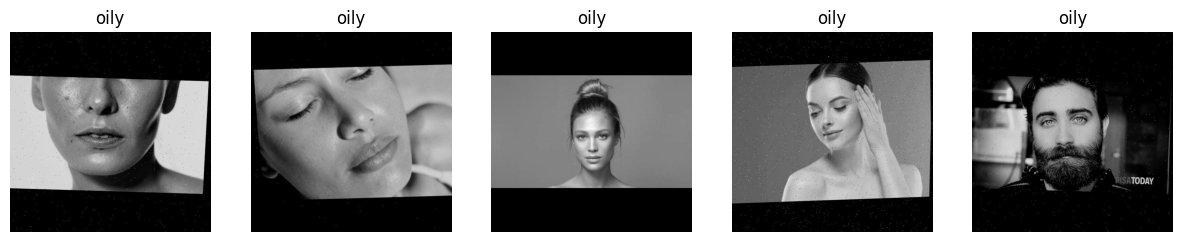

In [6]:
import cv2

# Function to plot images
def plot_images(category, dataset_path, num_images=5):
    folder_path = os.path.join(dataset_path, category)
    image_files = os.listdir(folder_path)[:num_images]  # Select first few images

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, img_file in enumerate(image_files):
        img = cv2.imread(os.path.join(folder_path, img_file), cv2.IMREAD_GRAYSCALE)  # Read image
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(category)
        axes[i].axis('off')

    plt.show()

# Show images from both categories
plot_images("dry", train_path)
plot_images("normal", train_path)
plot_images("oily", train_path)


In [7]:
import os
import random
import shutil

def copy_and_balance_data(source_dir, dest_dir, seed=42):
    random.seed(seed)  # Set the random seed for reproducibility
    os.makedirs(dest_dir, exist_ok=True)
    
    # Define category paths
    dry_src = os.path.join(source_dir, "dry")
    normal_src = os.path.join(source_dir, "normal")
    oily_src = os.path.join(source_dir, "oily")
    
    dry_dest = os.path.join(dest_dir, "dry")
    normal_dest = os.path.join(dest_dir, "normal")
    oily_dest = os.path.join(dest_dir, "oily")
    
    os.makedirs(dry_dest, exist_ok=True)
    os.makedirs(normal_dest, exist_ok=True)
    os.makedirs(oily_dest, exist_ok=True)

    # Get image lists
    dry_images = os.listdir(dry_src)
    normal_images = os.listdir(normal_src)
    oily_images = os.listdir(oily_src)

    # Balance dataset (Take minimum count)
    min_count = min(len(dry_images), len(normal_images),len(oily_images))

    # Randomly sample images
    dry_sample = random.sample(dry_images, min_count)
    normal_sample = random.sample(normal_images, min_count)
    oily_sample = random.sample(oily_images, min_count)

    # Copy sampled images to new location
    for img in dry_sample:
        shutil.copy(os.path.join(dry_src, img), os.path.join(dry_dest, img))

    for img in normal_sample:
        shutil.copy(os.path.join(normal_src, img), os.path.join(normal_dest, img))
    for img in oily_sample:
        shutil.copy(os.path.join(oily_src, img), os.path.join(normal_dest, img))

    print(f"Balanced dataset created at {dest_dir}: {min_count} dry, {min_count} normal, {min_count} oily")

# Source (Read-only) and Destination (Writable) Directories
source_path = "/kaggle/input/oily-dry-and-normal-skin-types-dataset/Oily-Dry-Skin-Types/train"
dest_path = "/kaggle/working/balanced__set/train/"

# Run function
copy_and_balance_data(source_path, dest_path)

Balanced dataset created at /kaggle/working/balanced__set/train/: 652 dry, 652 normal, 652 oily


In [8]:
balanced_data_path="/kaggle/working/balanced__set/train/"

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 224
batch_size = 32
seed=42

In [10]:
# Function to count images
def count_images(path):
    total_images = sum([len(files) for _, _, files in os.walk(path)])
    return total_images

# Count images in each set
train_size = count_images(train_path)
val_size = count_images(val_path)
test_size = count_images(test_path)

print(f"📊 Dataset Sizes:")
print(f"Training set: {train_size} images")
print(f"Validation set: {val_size} images")
print(f"Test set: {test_size} images")

📊 Dataset Sizes:
Training set: 2756 images
Validation set: 262 images
Test set: 134 images


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.6, 1.2],
    shear_range=0.1,
    fill_mode='nearest',
    validation_split=0.2  # Using 20% of training data for validation
)

# Training Generator
train_generator = train_datagen.flow_from_directory(
    directory=balanced_data_path,
    target_size=(150, 150),  # Example image size
    batch_size=32,
    class_mode='categorical',  # Changed to categorical for 3 classes
    subset='training',
    seed=42
)

# Validation Generator (from training split)
val_generator = train_datagen.flow_from_directory(
    directory=val_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    seed=42
)

# Test Generator (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    directory=test_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Verify class labels and indices
print("\nClass Indices:")
print("Training:", train_generator.class_indices)
print("Validation:", val_generator.class_indices)
print("Test:", test_generator.class_indices)

# Verify batch shapes
sample_batch = next(train_generator)
print("\nSample batch shape - Images:", sample_batch[0].shape, "Labels:", sample_batch[1].shape)

Found 1566 images belonging to 3 classes.
Found 52 images belonging to 3 classes.
Found 134 images belonging to 3 classes.

Class Indices:
Training: {'dry': 0, 'normal': 1, 'oily': 2}
Validation: {'dry': 0, 'normal': 1, 'oily': 2}
Test: {'dry': 0, 'normal': 1, 'oily': 2}

Sample batch shape - Images: (32, 150, 150, 3) Labels: (32, 3)


In [12]:
from tensorflow.keras.applications import EfficientNetV2B0
base_model = EfficientNetV2B0(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

I0000 00:00:1752828867.266740      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1752828867.267545      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [18]:
import tensorflow as tf
from tensorflow.keras import models, layers

In [20]:
# 1. Load Base Model (with your corrected weights approach)
base_model = EfficientNetV2B0(
    weights='imagenet',  # Or use local path if needed
    include_top=False,
    input_shape=(150, 150, 3)
)

# 2. Freeze Base Layers (initial training)
base_model.trainable = False

# 3. Add Custom Head
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')  # 3 output classes
])

# 4. Compile Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 5. Model Summary
model.summary()
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.1, patience=3)
]

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=callbacks
)

# 5. Model Summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-b0 (Functional)  │ (None, 5, 5, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,248,019 (23.83 MB)

 Trainable params: 328,707 (1.25 MB)

 Non-trainable params: 5,919,312 (22.58 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


I0000 00:00:1752829004.665888     142 service.cc:148] XLA service 0x7e22cc003dc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752829004.666860     142 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1752829004.666887     142 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1752829006.829891     142 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/49 ━━━━━━━━━━━━━━━━━━━━ 26:02 33s/step - accuracy: 0.4062 - loss: 1.1055

I0000 00:00:1752829018.641601     142 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


49/49 ━━━━━━━━━━━━━━━━━━━━ 68s 742ms/step - accuracy: 0.5931 - loss: 0.7750 - val_accuracy: 0.4231 - val_loss: 2.6493 - learning_rate: 0.0010
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 12s 244ms/step - accuracy: 0.6361 - loss: 0.6781 - val_accuracy: 0.4231 - val_loss: 2.7199 - learning_rate: 0.0010
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 12s 248ms/step - accuracy: 0.6726 - loss: 0.6369 - val_accuracy: 0.4231 - val_loss: 3.3199 - learning_rate: 0.0010
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 13s 263ms/step - accuracy: 0.6820 - loss: 0.6265 - val_accuracy: 0.4231 - val_loss: 3.5461 - learning_rate: 0.0010
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 13s 257ms/step - accuracy: 0.6567 - loss: 0.6532 - val_accuracy: 0.4231 - val_loss: 3.5639 - learning_rate: 1.0000e-04
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 13s 257ms/step - accuracy: 0.6664 - loss: 0.6446 - val_accuracy: 0.4231 - val_loss: 3.5703 - learning_rate: 1.0000e-04


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-b0 (Functional)  │ (None, 5, 5, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,905,435 (26.34 MB)

 Trainable params: 328,707 (1.25 MB)

 Non-trainable params: 5,919,312 (22.58 MB)

 Optimizer params: 657,416 (2.51 MB)

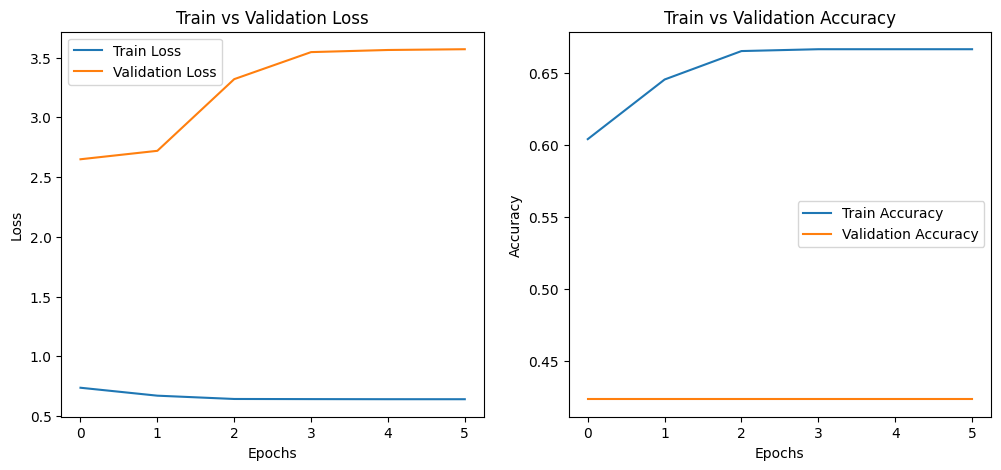

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train vs Validation Loss')

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train vs Validation Accuracy')

plt.show()


In [22]:
model.save("skin_type_classifier_PT.h5")